# Categorization model of a Classification tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Load Data
The data are about a Heart Attack and we took them from: https://archive.ics.uci.edu/ml/index.php (uci machine learning repository)

In [2]:
df = pd.read_csv('processed.cleveland.data', header = None)
df.head(5) # Shows the first 5 when we have default as an input

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The data characteristics
 -  #0 (age)
 -  #1 (sex) (1 = male; 0 = female)
 -  #2 (cp) chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
 -  #3 (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
 -  #4 (chol)  serum cholestoral in mg/dl
 -  #5 (fbs) fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
 -  #6 (restecg) resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 -  #7 (thalach) maximum heart rate achieved
 -  #8 (exang) exercise induced angina (1 = yes; 0 = no)
 -  #9 (oldpeak) ST depression induced by exercise relative to rest
 -  #10 (slope) the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
 -  #11 (ca) number of major vessels (0-3) colored by flourosopy
 -  #12 (thal) 
     - 3 = normal 
     - 6 = fixed defect
     - 7 = reversable defect
 -  #13 (hd) (the predicted attribute) diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

In [3]:
# Data Characteristics
df.columns = ['age',
             'sex',
             'cp',
             'trestbps',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']
df.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Missing data.
 1) I remove every line that has null. If there are lots of lines with missing data, I see in whice column they are and if they are important for categorization or not.
 
 2) Another method is about filling the spaces by replacing them with the average of the values.

In [4]:
# Type of Data
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [5]:
# Check the characteristics with the type object (ca, thal)
print("object ca")
print(df['ca'].unique())
print("object thal")
print(df['thal'].unique())

object ca
['0.0' '3.0' '2.0' '1.0' '?']
object thal
['6.0' '3.0' '7.0' '?']


The "?" shows that there is a lack of data in the column, thats why its a type object. With that I found the missing data.

In [6]:
df_loc_q = df.loc[(df['ca'] == '?')
        | 
        (df['thal'] == '?')]
len_df_loc_q = len(df_loc_q)
print("Number of lines with question marks: ", len_df_loc_q)
df_loc_q

Number of lines with question marks:  6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


We valuate if the amount of missing data is important or not

In [7]:
total_df = len(df)
print("The total data df: ", total_df)
precent_md = (len_df_loc_q)/total_df
print("Rate of missing data: ", round(precent_md*100), '%')

The total data df:  303
Rate of missing data:  2 %


It's a small amount so we dont have to create a new dataset

In [8]:
df_no_misiing =  df.loc[(df['ca'] != '?')
        &
        (df['thal'] != '?')]
print("Total data df_no_misiing: ", len(df_no_misiing))

Total data df_no_misiing:  297


# Format data: Seperation to data for the categorizationand we keep a column for the Tag.

In [9]:
# The data
X = df_no_misiing.drop(columns = ['hd']).copy() #df_no_misiing.drop('hd', axis = 1) or df_no_misiing.iloc([:,:-1]) removes columns from the data.
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [10]:
# Tags
y = df_no_misiing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

One hot encoding

In [11]:
# Data cp
print("The variables of cp: ", X['cp'].unique())
pd.get_dummies(X, columns = ['cp']).head()

The variables of cp:  [1. 4. 3. 2.]


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


The same for restecg, slope, thal

In [12]:
X_encoded = pd.get_dummies(X, columns = ['cp',
                                        'restecg',
                                        'slope',
                                        'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


Now we change the Tags. The y has 4 values and we want to make them two 0 for those without a heart attack and 1 for those with a heart attack.

In [13]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

if y > 0 they become 1

In [14]:
y_not_zero_index = y>0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

# First Classification tree decision

Seperation of data to trainning and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, test_size=0.3) # test_size = 0.25 default
# Classification decision tree
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5306122448979592, 0.9545454545454546, 'ca <= 0.5\ngini = 0.497\nsamples = 207\nvalue = [111, 96]\nclass = NO HD'),
 Text(0.28061224489795916, 0.8636363636363636, 'thal_3.0 <= 0.5\ngini = 0.36\nsamples = 119\nvalue = [91, 28]\nclass = NO HD'),
 Text(0.15306122448979592, 0.7727272727272727, 'age <= 51.5\ngini = 0.5\nsamples = 39\nvalue = [19, 20]\nclass = YES HD'),
 Text(0.08163265306122448, 0.6818181818181818, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [4, 14]\nclass = YES HD'),
 Text(0.04081632653061224, 0.5909090909090909, 'trestbps <= 115.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = NO HD'),
 Text(0.02040816326530612, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = YES HD'),
 Text(0.061224489795918366, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = NO HD'),
 Text(0.12244897959183673, 0.5909090909090909, 'trestbps <= 115.0\ngini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = YES HD'),
 Text(0.10204081632653061, 0.5, 'restecg_0.0 <= 0.5\ngini = 

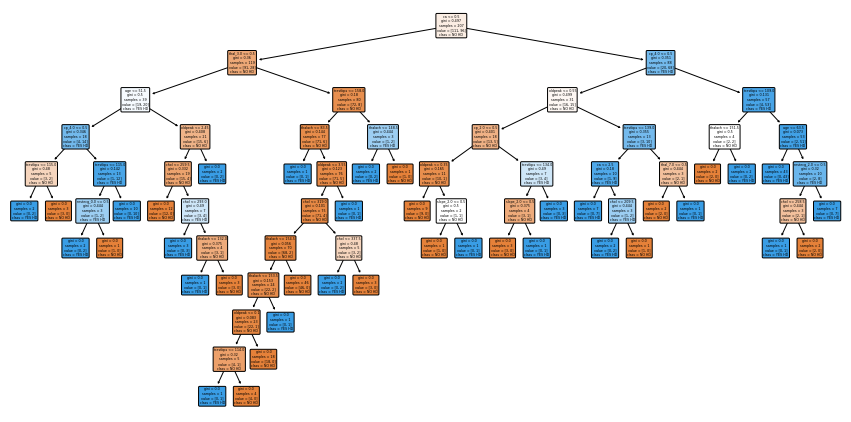

In [16]:
# Plot decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["NO HD", "YES HD"],
         feature_names=X_encoded.columns)

Making Confussion matrix to evaluate the Model

C:\Users\To Tali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


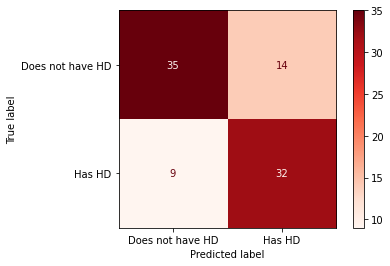

In [17]:
# Confussion Matrix
Y_pred = clf_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"], cmap = plt.cm.Reds)

In [18]:
# 1) accuracy
# 2) recall
# 3) specificity
# 4) precision
# 5) f1
def metric_score_cm(conf_matrix, metric='accuracy'):
    # x:TP, y:TN, z:FP, t:FN
    x, y, z, t = sym.symbols('x y z t')
    dict_metric = {'accuracy' : (x+y)/(x+y+z+t), 'recall':(x)/(x+t), 'specificity':(y)/(y+z), \
                'precision':(x)/(x+z), 'f1':(x)/(x+0.5*(z+t))}
    sz_mat = conf_matrix.shape
    vector = np.zeros((sz_mat[0], 1))
    metric_fun = dict_metric[metric]
    for i in range(0, sz_mat[0]):
        TP = conf_matrix[i,i]
        FP = np.sum(conf_matrix[0:sz_mat[0],i])-TP
        FN = np.sum(conf_matrix[i,0:sz_mat[0]])-TP
        TN = np.sum(conf_matrix)-TP-FP-FN
        sc = float(metric_fun.subs([(x, TP), (y, TN), (z, FP), (t, FN)]))
        vector[i] = sc
    return np.average(vector), vector
metrics = ["accuracy", "recall", "specificity", "precision", "f1"]
for m in metrics:
    output = metric_score_cm(cm_dt, metric=m)
    print(m, round(output[0]*100, 2), '%')

accuracy 74.44 %
recall 74.74 %
specificity 74.74 %
precision 74.56 %
f1 74.42 %


# Cost Complexity Pruning

The Decision Tree does overfitting to the data. So we use the cost complexity pruning to find the smallest tree to have accuracy to the model.
Formula of cost_dt = ssr + alpha*Τ, ssr is the residual sum of squares, alpha the veriable for the pruning GINI(alpha [0, 1]) and Τ the ammount of leafs.

In [19]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]


clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt = clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

We find the accuracy of the training set and testing set depending of alpha 

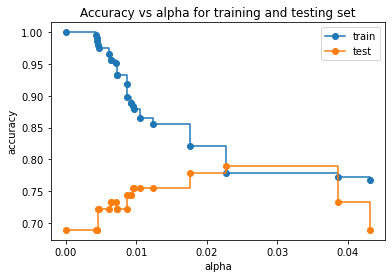

alpha:  0.022674051659558922
Accuracy train_score:  0.7777777777777778
Accuracy test_score:  0.7888888888888889


In [20]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing set")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()
max_val = max(test_scores)
index_max_val = test_scores.index(max_val)
print("alpha: ", ccp_alphas[index_max_val])
print("Accuracy train_score: ", train_scores[index_max_val])
print("Accuracy test_score: ", test_scores[index_max_val])

# Cross validation for finding the best alpha

<AxesSubplot:xlabel='tree'>

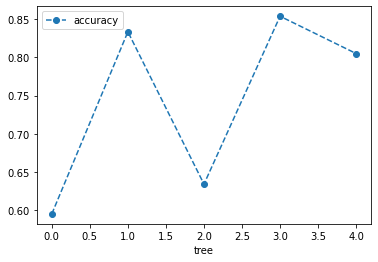

In [21]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0227)
## Cross Validation
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

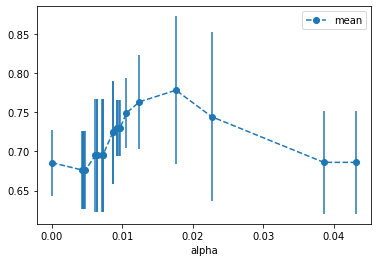

In [22]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean', 'std'])
alpha_results.plot(x='alpha',
                  y='mean',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [23]:
alpha_results[(alpha_results['alpha']>0.015)
             &
             (alpha_results['alpha']<0.02)]

,alpha,mean,std
20,0.017615,0.778049,0.094292


In [24]:
ideal_alpha=alpha_results[(alpha_results['alpha']>0.015)
             &
             (alpha_results['alpha']<0.02)]['alpha']
ideal_alpha = float(ideal_alpha)
ideal_alpha

0.017614802561039117

# Making a new decision tree

C:\Users\To Tali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(0.7777777777777778,
 array([[0.77777778],
        [0.77777778]]))

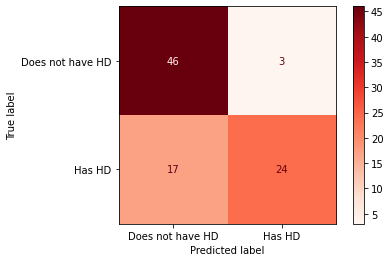

In [25]:
# Classification decision tree
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha=ideal_alpha)
clf_dt = clf_dt.fit(X_train, y_train)
# Confussion Matrix
Y_pred = clf_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"], cmap = plt.cm.Reds)
metric_score_cm(cm_dt, metric='accuracy')

[Text(0.5555555555555556, 0.875, 'ca <= 0.5\ngini = 0.497\nsamples = 207\nvalue = [111, 96]\nclass = NO HD'),
 Text(0.3333333333333333, 0.625, 'thal_3.0 <= 0.5\ngini = 0.36\nsamples = 119\nvalue = [91, 28]\nclass = NO HD'),
 Text(0.2222222222222222, 0.375, 'age <= 51.5\ngini = 0.5\nsamples = 39\nvalue = [19, 20]\nclass = YES HD'),
 Text(0.1111111111111111, 0.125, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]\nclass = YES HD'),
 Text(0.3333333333333333, 0.125, 'gini = 0.408\nsamples = 21\nvalue = [15, 6]\nclass = NO HD'),
 Text(0.4444444444444444, 0.375, 'gini = 0.18\nsamples = 80\nvalue = [72, 8]\nclass = NO HD'),
 Text(0.7777777777777778, 0.625, 'cp_4.0 <= 0.5\ngini = 0.351\nsamples = 88\nvalue = [20, 68]\nclass = YES HD'),
 Text(0.6666666666666666, 0.375, 'gini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = NO HD'),
 Text(0.8888888888888888, 0.375, 'gini = 0.131\nsamples = 57\nvalue = [4, 53]\nclass = YES HD')]

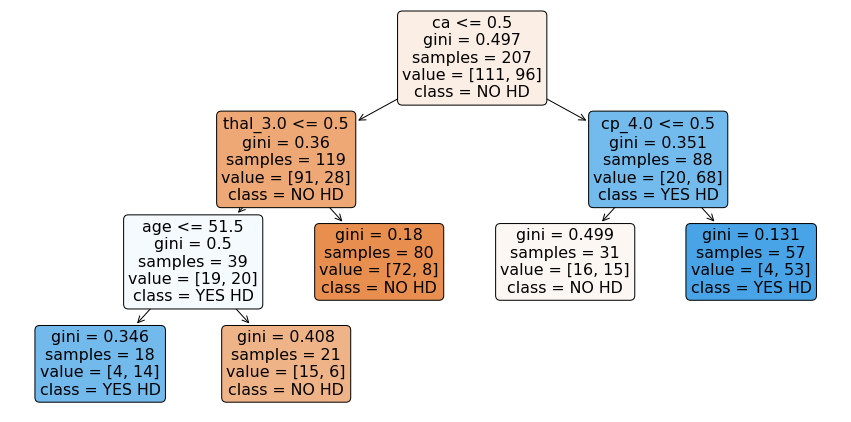

In [26]:
# Plot decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["NO HD", "YES HD"],
         feature_names=X_encoded.columns)